### Compare Performance to Univariate Kalman Filter

Let's implement a simple 1-D kalman filter using the Kalman filter from this chapter, and compare its output to the kalman filter from the previous chapter by plotting it. We will use a simple model of tracking an object that starts at x=0 and moves by 1 at each step. We will assume the arbitrary value 5 for the measurement noise and .02 for the process noise.

First, let's implement the filter from the *Univariate Filter* chapter.

In [1]:
from __future__ import division
import numpy as np
from numpy.random import randn
from filterpy.kalman import KalmanFilter

# 1-D Kalman filter equations
def predict(pos, variance, movement, movement_variance):
    return (pos + movement, variance + movement_variance)


def update (mu1, var1, mu2, var2):
    mean = (var1*mu2 + var2*mu1) / (var1+var2)
    variance = 1 / (1/var1 + 1/var2)
    return (mean, variance)

Now, let's implement the same thing using the Kalman filter. I will implement it as a function that returns a KalmanFilter object so that you can run the analysis code several times with the KalmanFilter initialized to the same starting conditions each time.

In [2]:
from filterpy.kalman import KalmanFilter

def mkf_filter(R, Q):
    f = KalmanFilter(dim_x=1, dim_z=1, dim_u=1)
    f.P = np.array([[500.]])
    f.H = np.array([[1.]])
    f.F = np.array([[1.]])
    f.B = np.array([[1.]])
    f.Q = Q
    f.R = R
    
    return f

Finally, let's compare the two. I will plot the data from the 1-D Kalman filter as a blue line, and the output of the filter from this chapter as red dots. I wrote it as a function so you can easily modify the parameters and regenerate the plots.

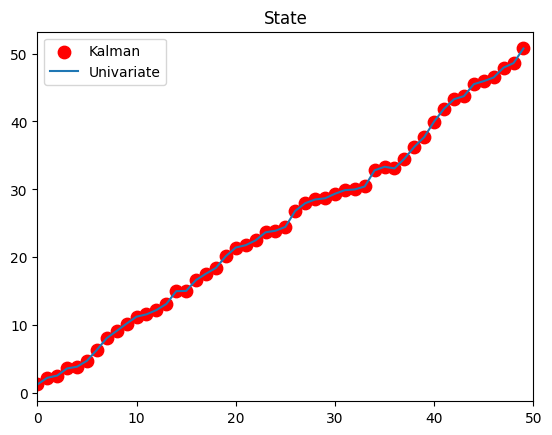

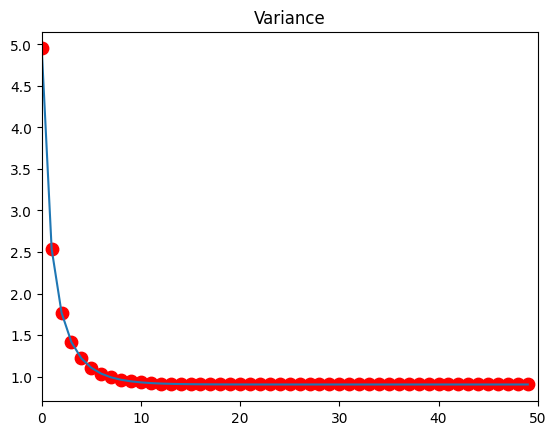

In [3]:
import matplotlib.pyplot as plt

def plot_kf_compare(x0, p0, R, Q, move):
    # storage for filter output
    x_uni, x_kf = [], []
    p1, p2 = [], []

    # initialize the filters
    f = mkf_filter(R, Q)
    f.x[0] = 0.
    f.P[0, 0] = p0
    pos = (x0, p0)
    for i in range(50):
        z = i*move + randn()
        pos = update(pos[0], pos[1], z, R)
        f.update(z)

        x_uni.append(pos[0])
        x_kf.append(f.x[0])

        p1.append(pos[1])
        p2.append(f.P[0, 0])

        u = move + randn()
        pos = predict(pos[0], pos[1], u, Q)
        f.predict(u=u)

    plt.scatter(range(len(x_kf)), x_kf, c='r', s=80, label='Kalman')
    plt.title('State')
    plt.plot(x_uni, label='Univariate')
    plt.xlim([0, 50])
    plt.legend()

    plt.figure()
    plt.plot(p1)
    plt.scatter(range(len(x_kf)), p2, c='r', s=80)
    plt.title('Variance')
    plt.xlim([0, 50])
    plt.show()
    
plot_kf_compare(x0=0., p0=500., R=5., Q=.2, move=1.)

As you can see, both filters produce the same results. Feel free to vary the initial guess, the measurement noise, and the process noise; so long as you make the same changes to both filters the output should be the same. This is a solid demonstration, albeit not a rigorous proof, that both filters in fact implement the same math for the 1-D case. 